In [5]:
# Imports
import itertools
import time
import string
import random
import matplotlib.pyplot as plt

## Ethical note & safeguards

- This brute-force demonstration is educational only. Do **not** use it to attack systems or accounts you are not authorized to test.
- Be cautious: brute-force grows exponentially; avoid large charsets and long target lengths.
- The notebook will limit maximum length and charset size by default to prevent extremely long runs.

In [18]:
# --- INPUT: customize these ---
charset = 'abc12390'   # character set to try (e.g., 'abc123' or string.ascii_lowercase)
target_password = '1a290'  # the password to "crack" — keep it short for demo
max_length = 7  # maximum length to try (inclusive). Keep small for learning.
# --- End input ---

In [19]:
def brute_force_crack(target, charset, max_len):
    """
    Try all combinations of charset up to length max_len.
    Returns (found_password, attempts, time_seconds) or (None, attempts, time_seconds)
    """
    attempts = 0
    start = time.time()
    # Try lengths from 1 to max_len
    for length in range(1, max_len + 1):
        # product returns tuples of characters; join to form strings
        for tup in itertools.product(charset, repeat=length):
            attempts += 1
            attempt = ''.join(tup)
            if attempt == target:
                end = time.time()
                return attempt, attempts, end - start
    end = time.time()
    return None, attempts, end - start


In [20]:
# Safety check: warn user if parameters may be large
est_total = sum(len(charset)**l for l in range(1, max_length+1))
if est_total > 2_000_000:
    print("WARNING: Estimated attempts =", est_total, 
          "\nThis may take a long time. Consider reducing max_length or charset size.")
else:
    print("Estimated attempts:", est_total)

found, attempts, elapsed = brute_force_crack(target_password, charset, max_length)

if found:
    print(f"✅ Password found: '{found}'")
else:
    print("❌ Password NOT found within given max_length.")

print(f"Attempts: {attempts}")
print(f"Time taken: {elapsed:.6f} seconds")


This may take a long time. Consider reducing max_length or charset size.
✅ Password found: '1a290'
Attempts: 17280
Time taken: 0.004128 seconds


### Analysis

- **Time complexity:** O(|charset|^L) where L is the attempted password length (exponential).
- **Space complexity:** O(L) for the generated attempt string (negligible).
- **Practical implications:** Doubling the length L or increasing charset size by a small factor quickly explodes the search space.
- **Defensive notes:** Use rate-limiting, account lockouts, and strong hashing+salting to mitigate brute-force in real systems.

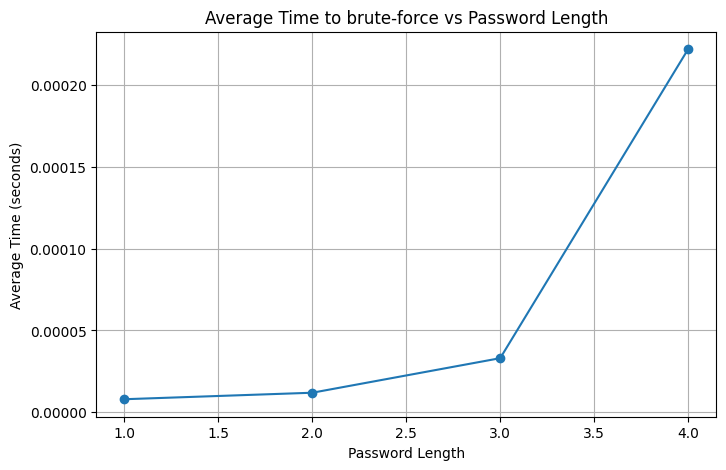

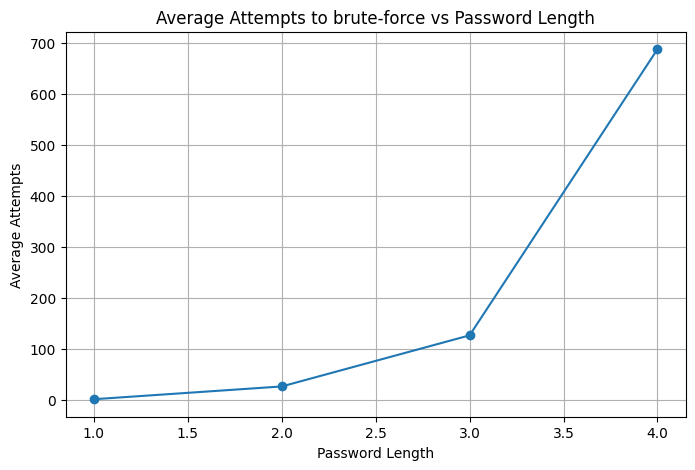

In [10]:
# Experiment: measure time to crack (or exhaust) for random targets of different lengths
# NOTE: keep charset and max_lengths small to keep runtime reasonable.
def time_for_length(length, trials=3):
    times = []
    attempts_list = []
    for _ in range(trials):
        # random target of given length from charset
        target = ''.join(random.choice(charset) for _ in range(length))
        # for fairness, set max_len == length to simulate worst-case/exhaustive search at that length
        _, attempts, elapsed = brute_force_crack(target, charset, length)
        times.append(elapsed)
        attempts_list.append(attempts)
    return sum(times)/len(times), sum(attempts_list)//len(attempts_list)

lengths = list(range(1, min(6, max_length+1)))  # limit plotted lengths
avg_times = []
avg_attempts = []

for L in lengths:
    t, a = time_for_length(L, trials=3)
    avg_times.append(t)
    avg_attempts.append(a)

# Plot: Time vs Length
plt.figure(figsize=(8,5))
plt.plot(lengths, avg_times, marker='o')  # do not set color explicitly
plt.title("Average Time to brute-force vs Password Length")
plt.xlabel("Password Length")
plt.ylabel("Average Time (seconds)")
plt.grid(True)
plt.show()

# Optional: Attempts vs Length
plt.figure(figsize=(8,5))
plt.plot(lengths, avg_attempts, marker='o')
plt.title("Average Attempts to brute-force vs Password Length")
plt.xlabel("Password Length")
plt.ylabel("Average Attempts")
plt.grid(True)
plt.show()


**Safe / Useful Variants**
- Instead of trying raw passwords, try cracking hashed passwords by comparing hash(target) to stored hash — but do this only on hashes you own.
- Use early pruning heuristics if you know structure (e.g., known prefix, required digits) to dramatically reduce search space.
- For larger, realistic charsets (e.g., lowercase+uppercase+digits), set `max_length` small or restrict experiments to shortest lengths.